In [ ]:
# Распознавание книг на картинке
import numpy as np
import cv2
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
# загрузите изображение, смените цвет на оттенки серого и уменьшите резкость


Mounted at /content/gdrive


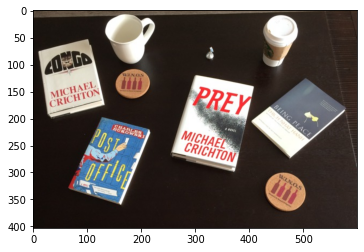

True

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

image_path="/content/gdrive/My Drive/"
image=cv2.imread(os.path.join(image_path,'books.jpg'),cv2.IMREAD_COLOR)


img_cvt=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()
#делаем изображение серым и размываем по Гаусу
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

cv2.imwrite(os.path.join(image_path,'gray.jpeg'), gray)


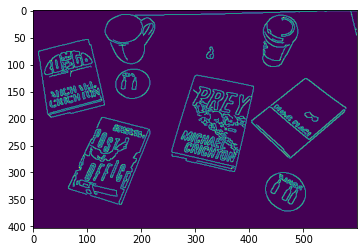

In [ ]:
#ищем контуры
edged = cv2.Canny(gray, 10, 250)
cv2.imwrite(os.path.join(image_path,'edged.jpeg'), edged)
plt.imshow(edged)
plt.show()

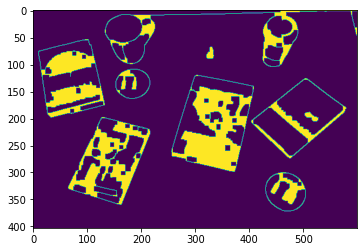

In [ ]:
# применяем закрытие
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2.imwrite(os.path.join(image_path,'closed.jpeg'), closed)
plt.imshow(closed)
plt.show()

Я нашёл 4 книг на этой картинке


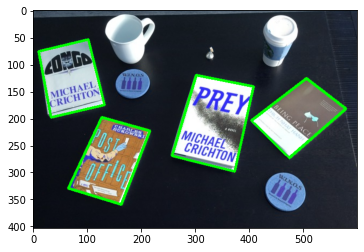

In [ ]:
# найдите контуры в изображении и подсчитайте количество книг
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
total = 0
# цикл по контурам
for c in cnts:
    # аппроксимируем (сглаживаем) контур
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # если у контура 4 вершины, предполагаем, что это книга
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1

print("Я нашёл {0} книг на этой картинке".format(total))
plt.imshow(image)
plt.show()
#cv2.imwrite("output.jpg", image))